In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [21]:
df1 = pd.read_csv("mental_cleaned.csv")
df22 = pd.read_csv("data/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
df3 = pd.read_csv("data/6- depressive-symptoms-across-us-population.csv")
df44 = pd.read_csv("data/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

In [22]:
df1

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990.000000,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991.000000,0.222454,3.767303,4.100860,0.702069,0.123256
2,Afghanistan,AFG,1992.000000,0.221751,4.981346,4.683743,0.700792,0.195365
3,Afghanistan,AFG,1993.000000,0.220987,3.767303,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994.000000,0.220183,4.977782,4.670810,0.699898,0.195365
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015.000000,0.201042,3.407624,4.100860,0.538596,0.195365
6416,Algeria,CHL,2016.000000,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2004.472189,0.201639,3.411965,3.188418,0.538589,0.195365
6418,Zimbabwe,ZWE,2018.000000,0.201976,3.406929,3.172111,0.538585,0.097909


In [23]:
df1_ent=df1.drop(["Entity","Year"],axis=1)
df=df1_ent.groupby('Code').mean()

In [24]:
# Assuming your data is stored in a DataFrame called df

# New column names
new_column_names = {
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating'
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

# Display the DataFrame with renamed columns
print(df)


      Schizophrenia  Depressive   Anxiety   Bipolar    Eating
Code                                                         
AFG        0.223247    4.828664  4.647262  0.687824  0.120704
AGO        0.220522    5.846069  3.973929  0.562717  0.119745
ALB        0.282077    2.481458  3.771262  0.555680  0.115813
AND        0.286709    3.608395  5.202232  0.920273  0.474165
ARE        0.280566    3.678485  4.131969  0.747051  0.297405
...             ...         ...       ...       ...       ...
WSM        0.285123    2.924681  3.945187  0.313547  0.094537
YEM        0.236576    4.687178  4.684103  0.722368  0.147879
ZAF        0.228085    4.111359  3.818607  0.571142  0.158694
ZMB        0.223266    4.181038  3.877597  0.579462  0.109275
ZWE        0.212587    3.364111  3.291787  0.538524  0.111101

[205 rows x 5 columns]


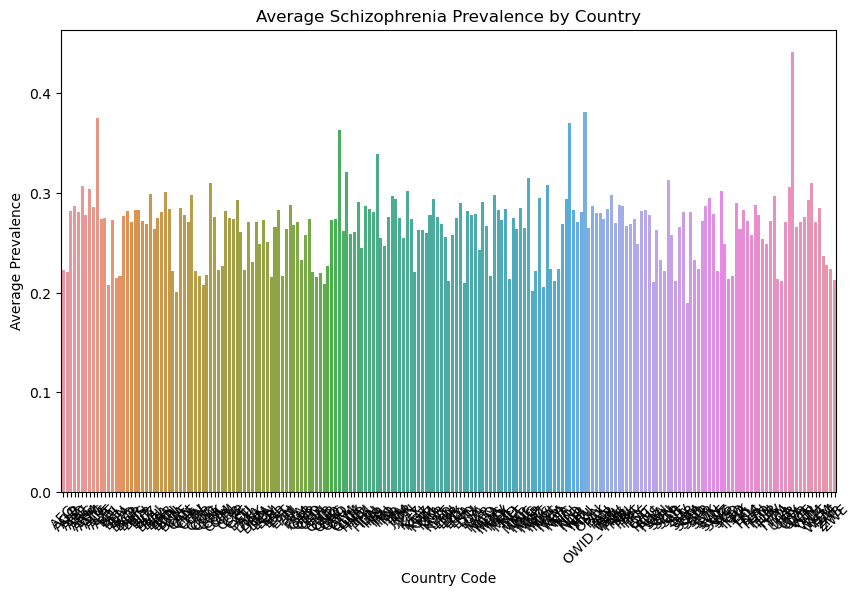

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart of Average Disorder Prevalence by Country
plt.figure(figsize=(10, 6))
sns.barplot(data=df.reset_index(), x='Code', y='Schizophrenia')
plt.title('Average Schizophrenia Prevalence by Country')
plt.xlabel('Country Code')
plt.ylabel('Average Prevalence')
plt.xticks(rotation=45)
plt.show()

# # Line Plot of Disorder Trends Over Time
# plt.figure(figsize=(10, 6))
# for country_code in df.index:
#     plt.plot(df.loc[df.index == country_code].drop(columns='Year').values.flatten(), label=country_code)
# plt.title('Disorder Trends Over Time')
# plt.xlabel('Disorder Type')
# plt.ylabel('Average Prevalence')
# plt.legend(title='Country Code')
# plt.xticks(range(len(df.columns) - 1), df.columns[1:], rotation=45)
# plt.show()

# # Stacked Bar Chart of Disorder Prevalence Across Countries
# plt.figure(figsize=(10, 6))
# df.plot(kind='bar', stacked=True, colormap='viridis')
# plt.title('Disorder Prevalence Across Countries')
# plt.xlabel('Country Code')
# plt.ylabel('Average Prevalence')
# plt.xticks(rotation=45)
# plt.legend(title='Disorder Type', loc='upper right')
# plt.show()


In [26]:
unique_codes = df1['Code'].unique()

# Print the unique values
print(len(unique_codes))

205


In [27]:
from sklearn.cluster import KMeans
import plotly.express as px
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df)

df1 = df.reset_index()
# Displaying the clustered data interactively using Plotly Express
fig1 = px.scatter(df1, x='Schizophrenia', y='Depressive', color='Cluster', title='Schizophrenia vs Depressive', height=600, hover_data=['Code'])
fig2 = px.scatter(df1, x='Schizophrenia', y='Anxiety', color='Cluster', title='Schizophrenia vs Anxiety', height=600, hover_data=['Code'])
fig3 = px.scatter(df1, x='Schizophrenia', y='Bipolar', color='Cluster', title='Schizophrenia vs Bipolar', height=600, hover_data=['Code'])
fig4 = px.scatter(df1, x='Schizophrenia', y='Eating', color='Cluster', title='Schizophrenia vs Eating', height=600, hover_data=['Code'])

# Show the figures
fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [28]:
# Selecting only the numerical columns related to mental disorders
X= df.iloc[:, 3:]
print(X.head())

# elbow plot
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot with plotly
fig = px.line(x=range(1, 11), y=inertia, title='Elbow Plot', labels={'x': 'Number of Clusters', 'y': 'Inertia'})
fig.show()

       Bipolar    Eating  Cluster
Code                             
AFG   0.687824  0.120704        0
AGO   0.562717  0.119745        0
ALB   0.555680  0.115813        1
AND   0.920273  0.474165        2
ARE   0.747051  0.297405        1


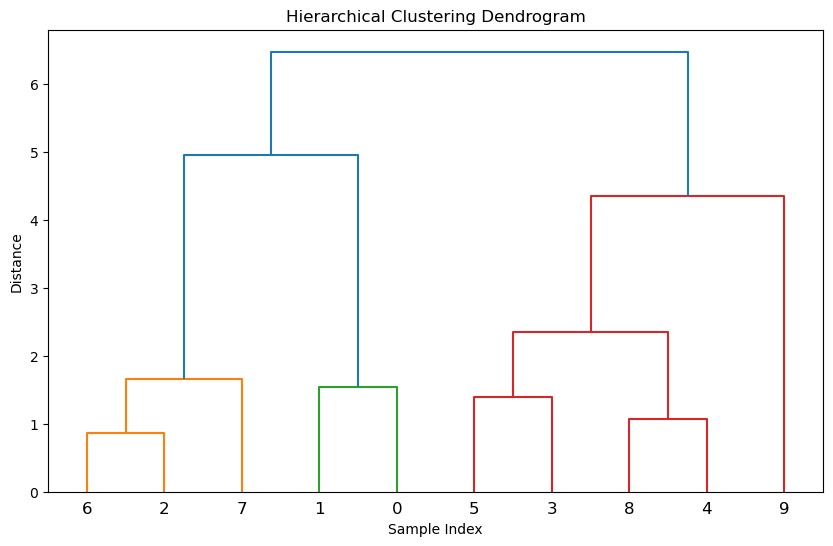

In [35]:
from scipy.cluster.hierarchy import linkage ,dendrogram 
from sklearn.preprocessing import StandardScaler

# Standardize the data
x = pd.DataFrame(df)
x.drop(["Cluster"],axis=1,inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x.iloc[:10,:])
scaled_data1 = scaler.fit_transform(x)


# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

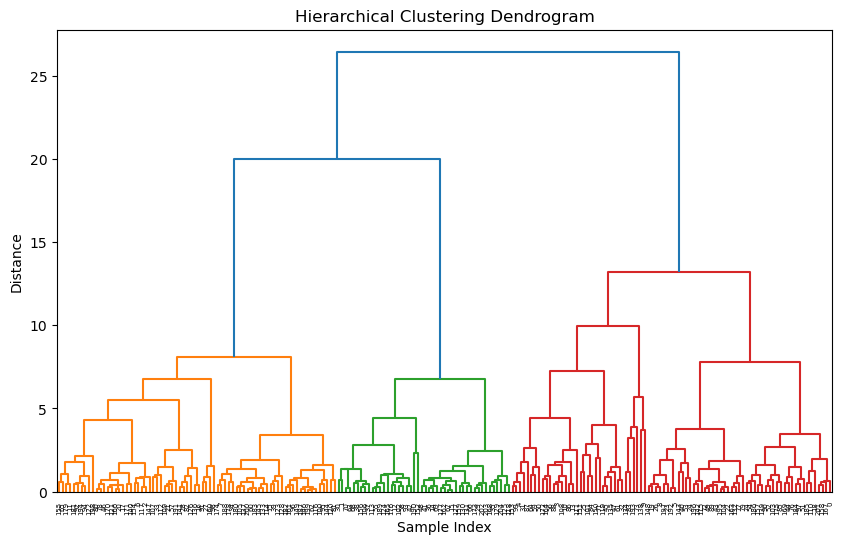

In [40]:
from scipy.cluster.hierarchy import linkage ,dendrogram 
from sklearn.preprocessing import StandardScaler

# Standardize the data
x = pd.DataFrame(df)
x.drop(["Cluster"],axis=1,inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x.iloc[:10,:])
scaled_data1 = scaler.fit_transform(x)


# Perform hierarchical clustering
linked = linkage(scaled_data1, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
# Perform agglomerative clustering
num_clusters = 3  
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
x['Cluster'] = agg_clustering.fit_predict(scaled_data1)
print(x.head())

      Schizophrenia  Depressive   Anxiety   Bipolar    Eating  Cluster
Code                                                                  
AFG        0.223247    4.828664  4.647262  0.687824  0.120704        0
AGO        0.220522    5.846069  3.973929  0.562717  0.119745        2
ALB        0.282077    2.481458  3.771262  0.555680  0.115813        1
AND        0.286709    3.608395  5.202232  0.920273  0.474165        0
ARE        0.280566    3.678485  4.131969  0.747051  0.297405        0


In [39]:
from sklearn.cluster import DBSCAN
cluster_DB = DBSCAN(eps = 0.55, min_samples = 4).fit(x)
labels_dB = cluster_DB.labels_
set(cluster_DB.labels_)

{-1, 0}